In [18]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import re

3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
1.11.1
0.18.1


### Question 1
How likely is it that a basket of commercially available food items is going to meet recommended levels of nutrients while staying within recommended calorie allowance?

In [3]:
df = pd.read_csv("random_days.tsv", sep = '\t')
#the datafields are quite long; tell pandas to show the whole fields
pd.set_option('display.max_colwidth', -1)
del df['Unnamed: 0']
df.head()

,total_calories,complete_micronutrients?,total_fat,total_saturated_fat,total_carbohydrates,total_fiber,total_sugar,total_protein,total_cholesterol_(mg),total_sodium_(mg),...,total_iron_(mg),codes,product_names,generic_names,categories,categories_tags,ingredients_texts,main_categories,fruits-vegetables-nuts_100g,nutrition-score-uk_100g
0,3594.400,False,194.680,68.03,361.50,41.458,145.249,99.07,11.80,2865.100000,...,26.41,"[77034009880, 24300031083, 85239194775, 76808280739, 602652170065, 37600209571, 21130016495, 30000063019, 892809000028, 70852991450]","['Roasted Salted Peanuts', 'Peanut Butter Chip Chewy Granola Bars', 'Black Beans', 'Penne', 'Kind Fruit and Nut', 'SPAM chopped pork and ham', 'Dark chocolate 78% Cacao', ""Cap'n Crunch"", 'Lemonade', 'Cream on Top Forest Berry Organic Yogurt ']","['peanuts', nan, nan, 'Pasta', 'Nut delight ', nan, nan, 'Sweetened corn & oat cereal', nan, nan]","['Plant-based foods and beverages,Plant-based foods,Salty snacks,Nuts,Peanuts', 'Sugary snacks,Bars', 'Canned common beans', 'Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Cereals and their products,Pastas', 'Energy bar', 'Canned meat', 'Dark chocolate', 'Plant-based foods and beverages,Plant-based foods,Breakfasts,Cereals and potatoes,Cereals and their products,Breakfast cereals', 'Lemonade', 'Dairies,Yogurts']","['en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:legumes,en:nuts-and-their-products,en:salty-snacks,en:nuts,en:peanuts', 'en:sugary-snacks,en:bars', 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:legumes-and-their-products,en:canned-foods,en:canned-plant-based-foods,en:canned-legumes,en:canned-common-beans', 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:pastas', 'en:sugary-snacks,en:dietary-supplements,en:bars,en:bodybuilding-supplements,en:energy-bars', 'en:canned-foods,en:canned-meats', 'en:sugary-snacks,en:chocolates,en:dark-chocolates', 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:breakfasts,en:cereals-and-potatoes,en:cereals-and-their-products,en:breakfast-cereals', 'en:beverages,en:carbonated-drinks,en:sodas,en:lemonades,en:sugared-beverages', 'en:dairies,en:yogurts']","['_Peanuts_ Roasted in peanut, Sunflower and/or Cottonseed oil, salt. ', nan, nan, 'SEMOLINA (_WHEAT_), DURUM _WHEAT_ FLOUR, NIACIN, IRON (FERROUS SULFATE), THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID.', 'Almonds, Walnuts, Brazil nuts, peanuts, honey, rice, flax', 'Pork 89%, Salt, Starch, Water, Ham 2%, Sugar, Stabiliser: Trisodium Diphosphate, Flavourings, Antioxidant: Sodium Ascorbate, Preservative: Sodium Nitrite', 'Chocolate Liquor, Cocoa Butter, Sugar, Cocoa Powder, Natural Flavor', 'Corn flour, sugar, _oat_ flour, brown sugar, _coconut_ oil, salt, niacinamide*, yellow 5, reduced iron, zinc oxide, yellow 6, thiamin mononitrate*, BHT (a preservative), pyridoxine hydrochloride*, riboflavin*, folic acid*. *One of the B vitamins', nan, 'Organic Pasteurized _Milk_, Organic Pasteurized _Cream_, Organic Nonfat Pasteurized _Milk_, Organic Raspberries, Organic Strawberries, Organic Blueberries, Organic Cane Sugar, Pectin, Organic Corn Starch, Natural Flavor, Live Active Cultures. ']","['en:peanuts', 'en:bars', 'en:canned-common-beans', 'en:pastas', 'en:bodybuilding-supplements', 'en:canned-meats', 'en:dark-chocolates', 'en:breakfast-cereals', 'en:lemonades', 'en:yogurts']","[nan, nan, nan, nan, nan, nan, nan, nan, 15.0, nan]","[13.0, 21.0, -6.0, -6.0, 7.0, 22.0, 15.0, 21.0, nan, 5.0]"
1,2172.910,False,43.830,5.95,363.10,30.023,133.100,81.51,430.00,2575.580000,...,12.29,"[199681, 2502108, 854252, 791669368678, 20662101266, 639277135322, 51000000118, 819898010004, 717544301721, 711575102104]","['Multigrain Toaster Waffles', 'Simply Lemonade', 'Mango Ginger Chutney', 'Crisp Rice Toasted Rice Cereal', 'Virgin Lemonade', 'Lite pancake syrup', 'Campbell Tomato Soup', 'Sea Salt & Cracked Black Pepper Rice

In [6]:
##get a quick shot of the macronutrients
df[['total_calories','total_fat', 'total_saturated_fat', 'total_carbohydrates', 'total_fiber', 'total_sugar', 'total_protein']].describe()

,total_calories,total_fat,total_saturated_fat,total_carbohydrates,total_fiber,total_sugar,total_protein
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2893.457875,134.021857,46.693100,355.803709,24.722620,151.900197,66.011582
std,635.965613,57.380308,26.221003,93.644081,13.107301,61.571774,23.786144
min,670.718000,1.540000,0.417000,63.260000,0.000000,10.680000,4.350000
25%,2461.790000,92.292500,28.240000,291.807500,15.582250,107.867500,48.860000
50%,2882.466500,128.080000,41.777500,354.265000,22.533500,146.895000,63.700000
75%,3318.200500,168.900000,59.945000,417.597750,31.340750,190.757500,80.222500
max,5406.900000,434.300000,225.820000,790.900000,106.183000,459.520000,192.560000


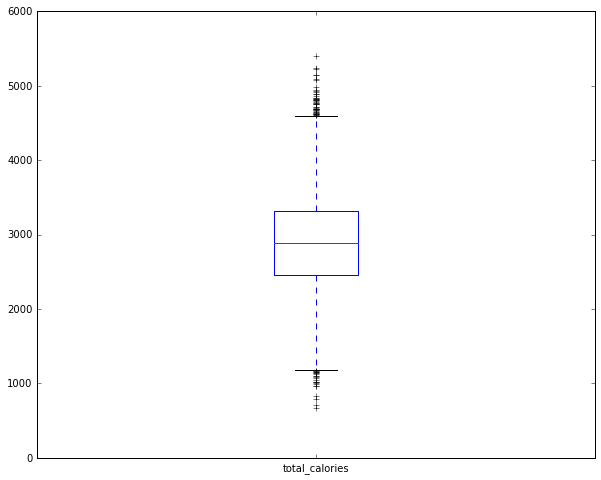

In [23]:
df['total_calories'].plot(kind = 'box', figsize=(10,8))

We can see that the majority of the calorie amounts are close around the median (the first and third quartile are hardly 900 calories apart) and we can see a long tail on both ends.  If this translates into a histogram approximating the normal curve, we can say this data is normal enough for a student-T statistical analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a627be0>]], dtype=object)

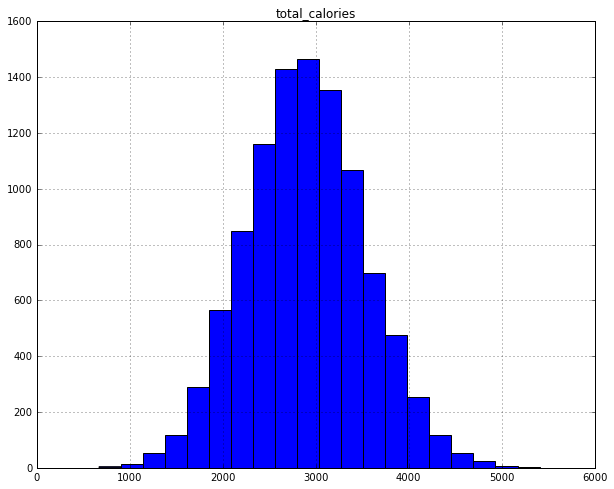

In [26]:
df.hist('total_calories', bins = 20, figsize=(10,8))

In [28]:
###check the skew
import scipy.stats
scipy.stats.skew(df['total_calories'])

0.10032877832237319

The histogram for calories follows the normal curve of standard statistcal distributions.  Since calories is a calculated field from carbohydrates, fat, and protein, we know that they are also going to have a normal shaped histogram.  When we calculate the skewness of the data, we can see that is it close to zero, with a slight skew towards the higher end.  Shew calculations range between [-1,1], and a skew of zero means there is no skew in the data.  This is good, as it shows that our data is very regular and good for further statistical analysis.

In [8]:
### get a quick shot of the micronutrients
df[['total_cholesterol_(mg)',
 'total_sodium_(mg)',
 'total_potassium_(mg)',
 'total_vitamin-a_(mcg)',
 'total_vitamin-c_(mg)',
 'total_calcium_(mg)',
 'total_iron_(mg)']].describe()

,total_cholesterol_(mg),total_sodium_(mg),total_potassium_(mg),total_vitamin-a_(mcg),total_vitamin-c_(mg),total_calcium_(mg),total_iron_(mg)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,136.137790,4826.230482,627.412500,838.748085,42.919978,663.297567,17.528808
std,127.107998,6114.651767,2389.865831,1063.884634,48.052890,462.123103,12.637390
min,0.000000,164.780000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.592500,2690.827500,54.200000,269.175000,11.592500,322.175000,8.840000
50%,105.635000,3661.400000,250.000000,588.450000,30.000000,540.550000,13.331000
75%,184.712500,4870.497500,560.000000,1083.000000,56.360000,902.550000,22.760000
max,1030.360000,89953.050000,27452.400000,20333.500000,549.780000,4629.700000,98.720000


In [7]:
list(df.columns)

['total_calories',
 'complete_micronutrients?',
 'total_fat',
 'total_saturated_fat',
 'total_carbohydrates',
 'total_fiber',
 'total_sugar',
 'total_protein',
 'total_cholesterol_(mg)',
 'total_sodium_(mg)',
 'total_potassium_(mg)',
 'total_vitamin-a_(mcg)',
 'total_vitamin-c_(mg)',
 'total_calcium_(mg)',
 'total_iron_(mg)',
 'codes',
 'product_names',
 'generic_names',
 'categories',
 'categories_tags',
 'ingredients_texts',
 'main_categories',
 'fruits-vegetables-nuts_100g',
 'nutrition-score-uk_100g']

In [9]:
df['complete_micronutrients?'].value_counts()

False    10000
Name: complete_micronutrients?, dtype: int64

Of the 10,000 tests, we have found that not a single day contained complete macronutrient data.  This implies that nutritional databases like this one are not always comprehensive.  This can cause consumer confusion. 